# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Multi-Class Classification

This Colab explores multi-class classification problems through the classic MNIST dataset.

# Clasificación Multi-Clase

Este Colab explora problemas de clasificación multi-clase a través del clásico conjunto de datos MNIST.

## Learning Objectives:

After doing this Colab, you'll know how to do the following:

  * Understand the classic MNIST problem.
  * Create a deep neural network that performs multi-class classification.
  * Tune the deep neural network.

This exercise introduces image classification with machine learning.

## Objetivos de Aprendizaje:

Después de realizar este Colab, sabrás cómo hacer lo siguiente:

  * Comprender el problema clásico de MNIST.
  * Crear una red neuronal profunda que realice clasificación multi-clase.
  * Ajustar la red neuronal profunda.

Este ejercicio introduce la clasificación de imágenes con aprendizaje automático.

## The Dataset
  
This MNIST dataset contains a lot of examples:

* The MNIST training set contains 60,000 examples.
* The MNIST test set contains 10,000 examples.

Each example contains a pixel map showing how a person wrote a digit. For example, the following images shows how a person wrote the digit `1` and how that digit might be represented in a 14x14 pixel map (after the input data is normalized).

![Two images. The first image shows a somewhat fuzzy digit one. The second image shows a 14x14 floating-point array in which most of the cells contain 0 but a few cells contain values between 0.0 and 1.0. The pattern of nonzero values corresponds to the image of the fuzzy digit in the first image.](https://www.tensorflow.org/images/MNIST-Matrix.png)

Each example in the MNIST dataset consists of:

* A label specified by a [rater](https://developers.google.com/machine-learning/glossary/#rater).  Each label must be an integer from 0 to 9.  For example, in the preceding image, the rater would almost certainly assign the label `1` to the example.
* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.  

This is a multi-class classification problem with 10 output classes, one for each digit.



## El Conjunto de Datos

Este conjunto de datos MNIST contiene una gran cantidad de ejemplos:

* El conjunto de entrenamiento de MNIST contiene 60,000 ejemplos.
* El conjunto de prueba de MNIST contiene 10,000 ejemplos.

Cada ejemplo contiene un mapa de píxeles que muestra cómo una persona escribió un dígito. Por ejemplo, las siguientes imágenes muestran cómo una persona escribió el dígito `1` y cómo ese dígito podría representarse en un mapa de píxeles de 14x14 (después de que los datos de entrada se normalizan).

![Dos imágenes. La primera imagen muestra un dígito uno algo borroso. La segunda imagen muestra una matriz de punto flotante de 14x14 en la que la mayoría de las celdas contienen 0 pero algunas celdas contienen valores entre 0.0 y 1.0. El patrón de valores no nulos corresponde a la imagen del dígito borroso en la primera imagen.](https://www.tensorflow.org/images/MNIST-Matrix.png)

Cada ejemplo en el conjunto de datos MNIST consta de:

* Una etiqueta especificada por un [evaluador](https://developers.google.com/machine-learning/glossary/#rater). Cada etiqueta debe ser un entero del 0 al 9. Por ejemplo, en la imagen anterior, el evaluador asignaría casi con seguridad la etiqueta `1` al ejemplo.
* Un mapa de píxeles de 28x28, donde cada píxel es un entero entre 0 y 255. Los valores de los píxeles están en una escala de grises en la que 0 representa blanco, 255 representa negro y los valores entre 0 y 255 representan varios tonos de gris.

Este es un problema de clasificación multi-clase con 10 clases de salida, una para cada dígito.

## Import relevant modules

The following hidden code cell imports the necessary code to run the code in the rest of this Colaboratory.

## Importar módulos relevantes

La siguiente celda de código oculta importa el código necesario para ejecutar el resto de este Colaboratory.

In [13]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

## Load the dataset

`tf.keras` provides a set of convenience functions for loading well-known datasets. Each of these convenience functions does the following:

* Loads both the training set and the test set.
* Separates each set into features and labels.

The relevant convenience function for MNIST is called `mnist.load_data()`:


## Cargar el conjunto de datos

`tf.keras` proporciona un conjunto de funciones de conveniencia para cargar conjuntos de datos bien conocidos. Cada una de estas funciones de conveniencia realiza las siguientes acciones:

* Carga tanto el conjunto de entrenamiento como el conjunto de prueba.
* Separa cada conjunto en características y etiquetas.

La función de conveniencia relevante para MNIST se llama `mnist.load_data()`:

In [14]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


Notice that `mnist.load_data()` returned four separate values:

* `x_train` contains the training set's features.
* `y_train` contains the training set's labels.
* `x_test` contains the test set's features.
* `y_test` contains the test set's labels.

**Note:** The MNIST .csv training set is already shuffled.


Observa que `mnist.load_data()` devolvió cuatro valores separados:

* `x_train` contiene las características del conjunto de entrenamiento.
* `y_train` contiene las etiquetas del conjunto de entrenamiento.
* `x_test` contiene las características del conjunto de prueba.
* `y_test` contiene las etiquetas del conjunto de prueba.

**Nota:** El conjunto de entrenamiento de MNIST en formato .csv ya está mezclado.

## View the dataset

The .csv file for the California Housing Dataset contains column names (for example, `latitude`, `longitude`, `population`). By contrast, the .csv file for MNIST does not contain column names. Instead of column names, you use ordinal numbers to access different subsets of the MNIST dataset. In fact, it is probably best to think of `x_train` and `x_test` as two-dimensional NumPy arrays:  


## Ver el conjunto de datos

El archivo .csv para el conjunto de datos de viviendas de California contiene nombres de columnas (por ejemplo, `latitude`, `longitude`, `population`). En cambio, el archivo .csv para MNIST no contiene nombres de columnas. En lugar de nombres de columnas, utilizas números ordinales para acceder a diferentes subconjuntos del conjunto de datos de MNIST. De hecho, probablemente sea mejor pensar en `x_train` y `x_test` como matrices NumPy bidimensionales:

In [15]:
# Output example #2917 of the training set.
x_train[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 100, 156, 239, 224, 177, 213, 159,  70,  13,   0,   0

Alternatively, you can call `matplotlib.pyplot.imshow` to interpret the preceding numeric array as an image.

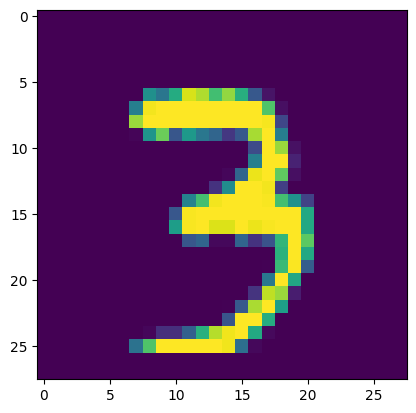

In [16]:
# Use false colors to visualize the array.
plt.imshow(x_train[2917])

In [17]:
# Output row #10 of example #2917.
x_train[2917][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 254, 216,  11,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [18]:
# Output pixel #16 of row #10 of example #2900.
x_train[2917][10][16]

58

## Task 1: Normalize feature values

Complete the following code cell to map each feature value from its current representation (an integer between 0 and 255) to a floating-point value between 0 and 1.0. Store the floating-point values in `x_train_normalized` and `x_test_normalized`.

## Tarea 1: Normalizar los valores de las características

Completa la siguiente celda de código para mapear cada valor de característica desde su representación actual (un entero entre 0 y 255) a un valor de punto flotante entre 0 y 1.0. Almacena los valores de punto flotante en `x_train_normalized` y `x_test_normalized`.

In [19]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2900][10]) # Output a normalized row

[0.         0.         0.         0.         0.         0.         0.         0.55294118 1.         0.66666667 0.11372549 0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


## Define a plotting function

The following function plots an accuracy curve:

## Define una función de trazado

La siguiente función traza una curva de precisión:

In [20]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


## Create a deep neural net model

The `create_model` function defines the topography of the deep neural net, specifying the following:

* The number of [layers](https://developers.google.com/machine-learning/glossary/#layer) in the deep neural net.
* The number of [nodes](https://developers.google.com/machine-learning/glossary/#node) in each layer.
* Any [regularization](https://developers.google.com/machine-learning/glossary/#regularization) layers.

The `create_model` function also defines the [activation function](https://developers.google.com/machine-learning/glossary/#activation_function) of each layer.  The activation function of the output layer is [softmax](https://developers.google.com/machine-learning/glossary/#softmax), which will yield 10 different outputs for each example. Each of the 10 outputs provides the probability that the input example is a certain digit.

**Note:** Unlike several of the recent Colabs, this exercise does not define feature columns or a feature layer.  Instead, the model will train on the NumPy array.

## Crea un modelo de red neuronal profunda

La función `create_model` define la topografía de la red neuronal profunda, especificando lo siguiente:

* El número de [capas](https://developers.google.com/machine-learning/glossary/#layer) en la red neuronal profunda.
* El número de [nodos](https://developers.google.com/machine-learning/glossary/#node) en cada capa.
* Cualquier capa de [regularización](https://developers.google.com/machine-learning/glossary/#regularization).

La función `create_model` también define la [función de activación](https://developers.google.com/machine-learning/glossary/#activation_function) de cada capa. La función de activación de la capa de salida es [softmax](https://developers.google.com/machine-learning/glossary/#softmax), que dará como resultado 10 salidas diferentes para cada ejemplo. Cada una de las 10 salidas proporciona la probabilidad de que el ejemplo de entrada sea un cierto dígito.

**Nota:** A diferencia de varios de los Colabs recientes, este ejercicio no define columnas de características ni una capa de características. En su lugar, el modelo se entrenará en la matriz NumPy.

In [21]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""

  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # The features are stored in a two-dimensional 28X28 array.
  # Flatten that two-dimensional array into a one-dimensional
  # 784-element array.
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Define the first hidden layer.
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))

  # Define a dropout regularization layer.
  model.add(tf.keras.layers.Dropout(rate=0.2))

  # Define the output layer. The units parameter is set to 10 because
  # the model must choose among 10 possible output values (representing
  # the digits from 0 to 9, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  # Construct the layers into a model that TensorFlow can execute.
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

  return model


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True,
                      validation_split=validation_split)

  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

## Invoke the previous functions

Run the following code cell to invoke the preceding functions and actually train the model on the training set.

**Note:** Due to several factors (for example, more examples and a more complex neural network) training MNIST might take longer than training the California Housing Dataset.

## Invoca las funciones anteriores

Ejecuta la siguiente celda de código para invocar las funciones anteriores y entrenar el modelo en el conjunto de entrenamiento.

**Nota:** Debido a varios factores (por ejemplo, más ejemplos y una red neuronal más compleja), el entrenamiento de MNIST puede llevar más tiempo que el entrenamiento del conjunto de datos de viviendas de California.

Epoch 1/50
12/12 [==============================] - 1s 39ms/step - loss: 1.6231 - accuracy: 0.5019 - val_loss: 0.9024 - val_accuracy: 0.7929
Epoch 2/50
12/12 [==============================] - 0s 18ms/step - loss: 0.8394 - accuracy: 0.7492 - val_loss: 0.5059 - val_accuracy: 0.8688
Epoch 3/50
12/12 [==============================] - 0s 18ms/step - loss: 0.6050 - accuracy: 0.8173 - val_loss: 0.4031 - val_accuracy: 0.8902
Epoch 4/50
12/12 [==============================] - 0s 18ms/step - loss: 0.5068 - accuracy: 0.8506 - val_loss: 0.3480 - val_accuracy: 0.9029
Epoch 5/50
12/12 [==============================] - 0s 16ms/step - loss: 0.4502 - accuracy: 0.8676 - val_loss: 0.3154 - val_accuracy: 0.9112
Epoch 6/50
12/12 [==============================] - 0s 18ms/step - loss: 0.4154 - accuracy: 0.8790 - val_loss: 0.2918 - val_accuracy: 0.9168
Epoch 7/50
12/12 [==============================] - 0s 20ms/step - loss: 0.3877 - accuracy: 0.8859 - val_loss: 0.2756 - val_accuracy: 0.9216
Epoch 8/50
12

[0.1444968432188034, 0.9563000202178955]

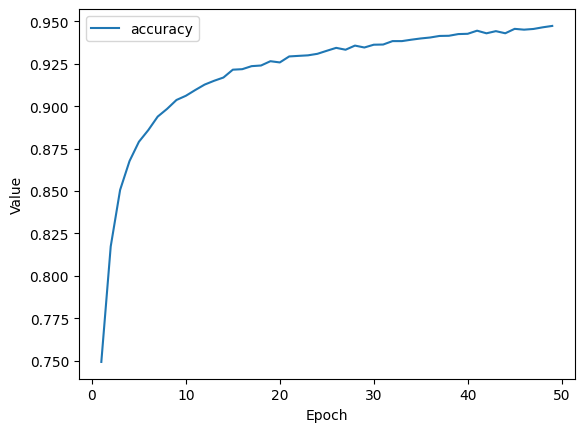

In [22]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_normalized, y_train,
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

## Task 2: Optimize the model

Experiment with the following:

* number of hidden layers
* number of nodes in each layer
* dropout regularization rate

What trends did you discover?  Can you reach at least 98% accuracy against the test set?


## Tarea 2: Optimizar el modelo

Experimenta con lo siguiente:

* número de capas ocultas
* número de nodos en cada capa
* tasa de regularización dropout

¿Qué tendencias descubriste? ¿Puedes alcanzar al menos un 98% de precisión en el conjunto de prueba?

In [23]:
# It would take much too long to experiment
# fully with topography and dropout regularization
# rate. In the real world, you would
# also experiment with learning rate, batch size,
# and number of epochs.  Since you only have a
# few minutes, searching for trends can be helpful.
# Here is what we discovered:
#   * Adding more nodes (at least until 256 nodes)
#     to the first hidden layer improved accuracy.
#   * Adding a second hidden layer generally
#     improved accuracy.
#   * When the model contains a lot of nodes,
#     the model overfits unless the dropout rate
#     is at least 0.5.

# We reached 98% test accuracy with the
# following configuration:
#   * One hidden layer of 256 nodes; no second
#     hidden layer.
#   * dropout regularization rate of 0.4

# We reached 98.2% test accuracy with the
# following configuration:
#   * First hidden layer of 256 nodes;
#     second hidden layer of 128 nodes.
#   * dropout regularization rate of 0.2


#####################################################

# Experimentar completamente con la topografía y la tasa de regularización dropout llevaría demasiado tiempo. En el mundo real, también experimentarías con la tasa de aprendizaje, el tamaño del lote y el número de épocas. Dado que solo tienes unos minutos, buscar tendencias puede ser útil. Esto es lo que descubrimos:

# * Agregar más nodos (al menos hasta 256 nodos) a la primera capa oculta mejoró la precisión.
# * Agregar una segunda capa oculta generalmente mejoró la precisión.
# * Cuando el modelo tiene muchos nodos, tiende a sobreajustarse a menos que la tasa de dropout sea al menos 0.5.

# Alcanzamos una precisión del 98% en el conjunto de prueba con la siguiente configuración:
# * Una capa oculta de 256 nodos; sin segunda capa oculta.
# * Tasa de regularización dropout de 0.4

# Alcanzamos una precisión del 98.2% en el conjunto de prueba con la siguiente configuración:
# * Primera capa oculta de 256 nodos; segunda capa oculta de 128 nodos.
# * Tasa de regularización dropout de 0.2
